<a href="https://colab.research.google.com/github/DroidWW/ML_FINAL_WW/blob/main/%D0%B8%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer/data

# **Тема проекта "Анализ влияния факторов на возникновение рака легких"**

Этот набор данных является бесценным активом в сфере здравоохранения, обеспечивая структурированную основу для разработки моделей выявления рака. Этот набор данных иллюстрирует разнообразие симптомов рака легких. Каждая категория в наборе данных — "ПОЛ", "ВОЗРАСТ", "КУРЕНИЕ", "ЖЕЛТЫЕ ПАЛЬЦЫ", "БЕСПОКОЙСТВО", "ДАВЛЕНИЕ СО стороны СВЕРСТНИКОВ", "ХРОНИЧЕСКОЕ ЗАБОЛЕВАНИЕ", "УСТАЛОСТЬ", "АЛЛЕРГИЯ", "ОДЫШКА", "УПОТРЕБЛЕНИЕ АЛКОГОЛЯ", "КАШЕЛЬ", "ЗАТРУДНЕННОЕ ДЫХАНИЕ", "ЗАТРУДНЕННОЕ ГЛОТАНИЕ", "БОЛЬ В ГРУДИ" — была тщательно подобрана, чтобы охватить широкий спектр симптомов, гарантируя, что результирующие модели универсальны и точны. Такой научный подход не только увеличивает разнообразие набора данных для регистрации симптомов рака легких, но и вносит вклад в более широкую область медицинских технологий, основанных на искусственном интеллекте, расширяя границы возможностей медицинских ассистентов.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, f1_score

Загрузка датасета и вывод первых 5 строк

In [ ]:
df=pd.read_csv('/content/survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Вывод информации о столбцах датасета и вывод статистической информации

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df.shape

(309, 16)

GENDER : M [Male] , F [Female]

AGE : Age of patients

SMOKING : 2 [Yes] , 1 [No]

YELLOW_FINGERS : 2 [Yes] , 1 [No]

ANXIETY : 2 [Yes] , 1 [No]

PEER_PRESSURE : 2 [Yes] , 1 [No]

CHRONIC DISEASE : 2 [Yes] , 1 [No]

FATIGUE : 2 [Yes] , 1 [No]

ALLERGY : 2 [Yes] , 1 [No]

WHEEZING : 2 [Yes] , 1 [No]

ALCOHOL CONSUMING : 2 [Yes] , 1 [No]

COUGHING : 2 [Yes] , 1 [No]

SHORTNESS OF BREATH : 2 [Yes] , 1 [No]

SWALLOWING DIFFICULTY : 2 [Yes] , 1 [No]

CHEST PAIN : 2 [Yes] , 1 [No]

LUNG_CANCER : YES [Positive] , NO [Negative]

In [ ]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


Проверка датаеста на дубликаты

In [ ]:
df.duplicated().sum()

33

In [ ]:
df=df.drop_duplicates()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

for column in df.columns:
  df[column] = le.fit_transform(df[column])

<ipython-input-21-54e8a2334bf9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
<ipython-input-21-54e8a2334bf9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
<ipython-input-21-54e8a2334bf9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,26,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,31,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,16,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,20,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,20,0,1,0,0,0,0,0,1,0,1,1,0,0,0


0=no, 1=yes, male=1, female=0


<Axes: >

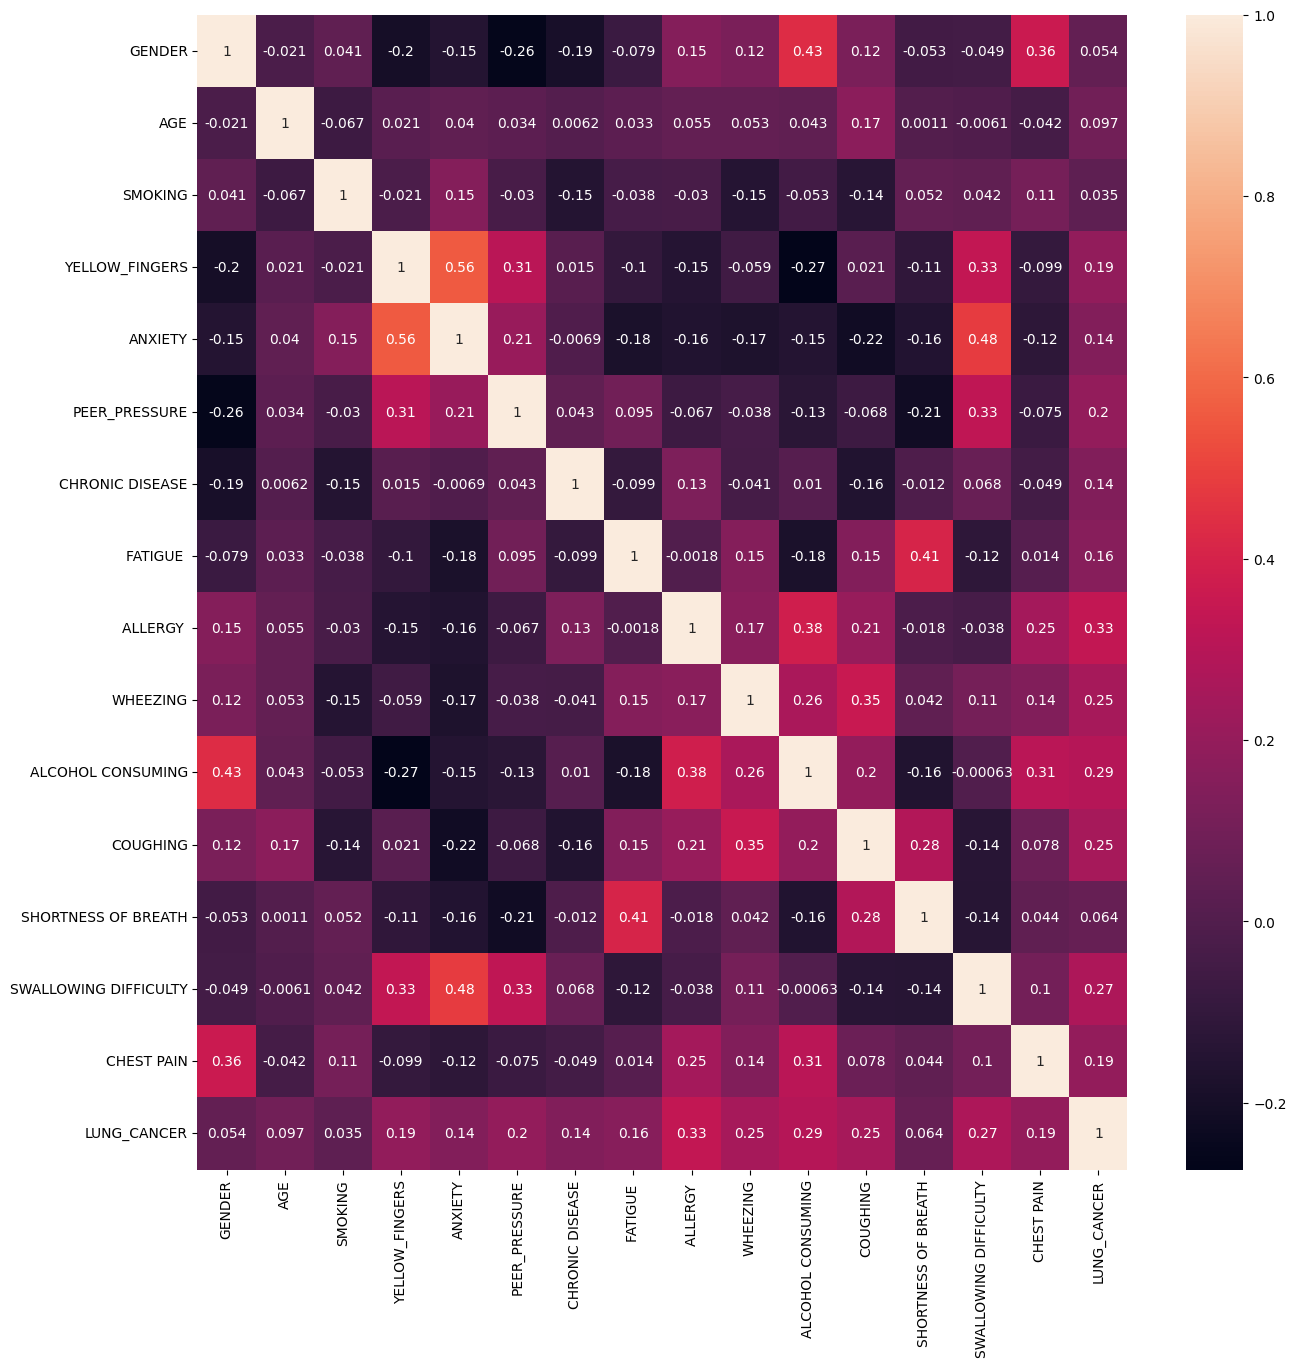

In [ ]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

<ipython-input-133-3e5b51265201>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'LUNG_CANCER',data = df,palette=['#ca3a27','#92D36E'])


,count
LUNG_CANCER,
1,238
0,38


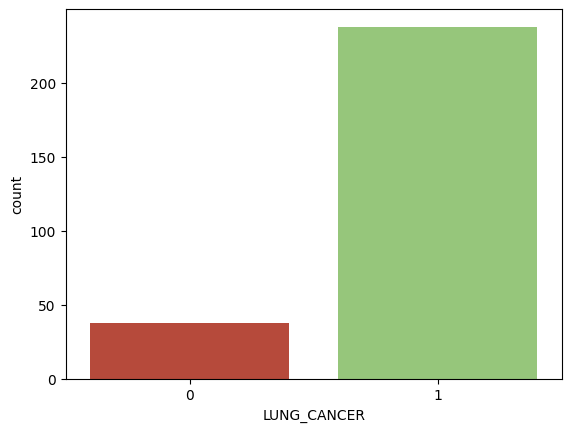

In [ ]:
sns.countplot(x = 'LUNG_CANCER',data = df,palette=['#ca3a27','#92D36E'])
df['LUNG_CANCER'].value_counts()

In [ ]:
# def plot(col, df=df):
#     return df.groupby(col)['LUNG_CANCER'].value_counts().unstack().plot(kind='bar', figsize=(8,5))

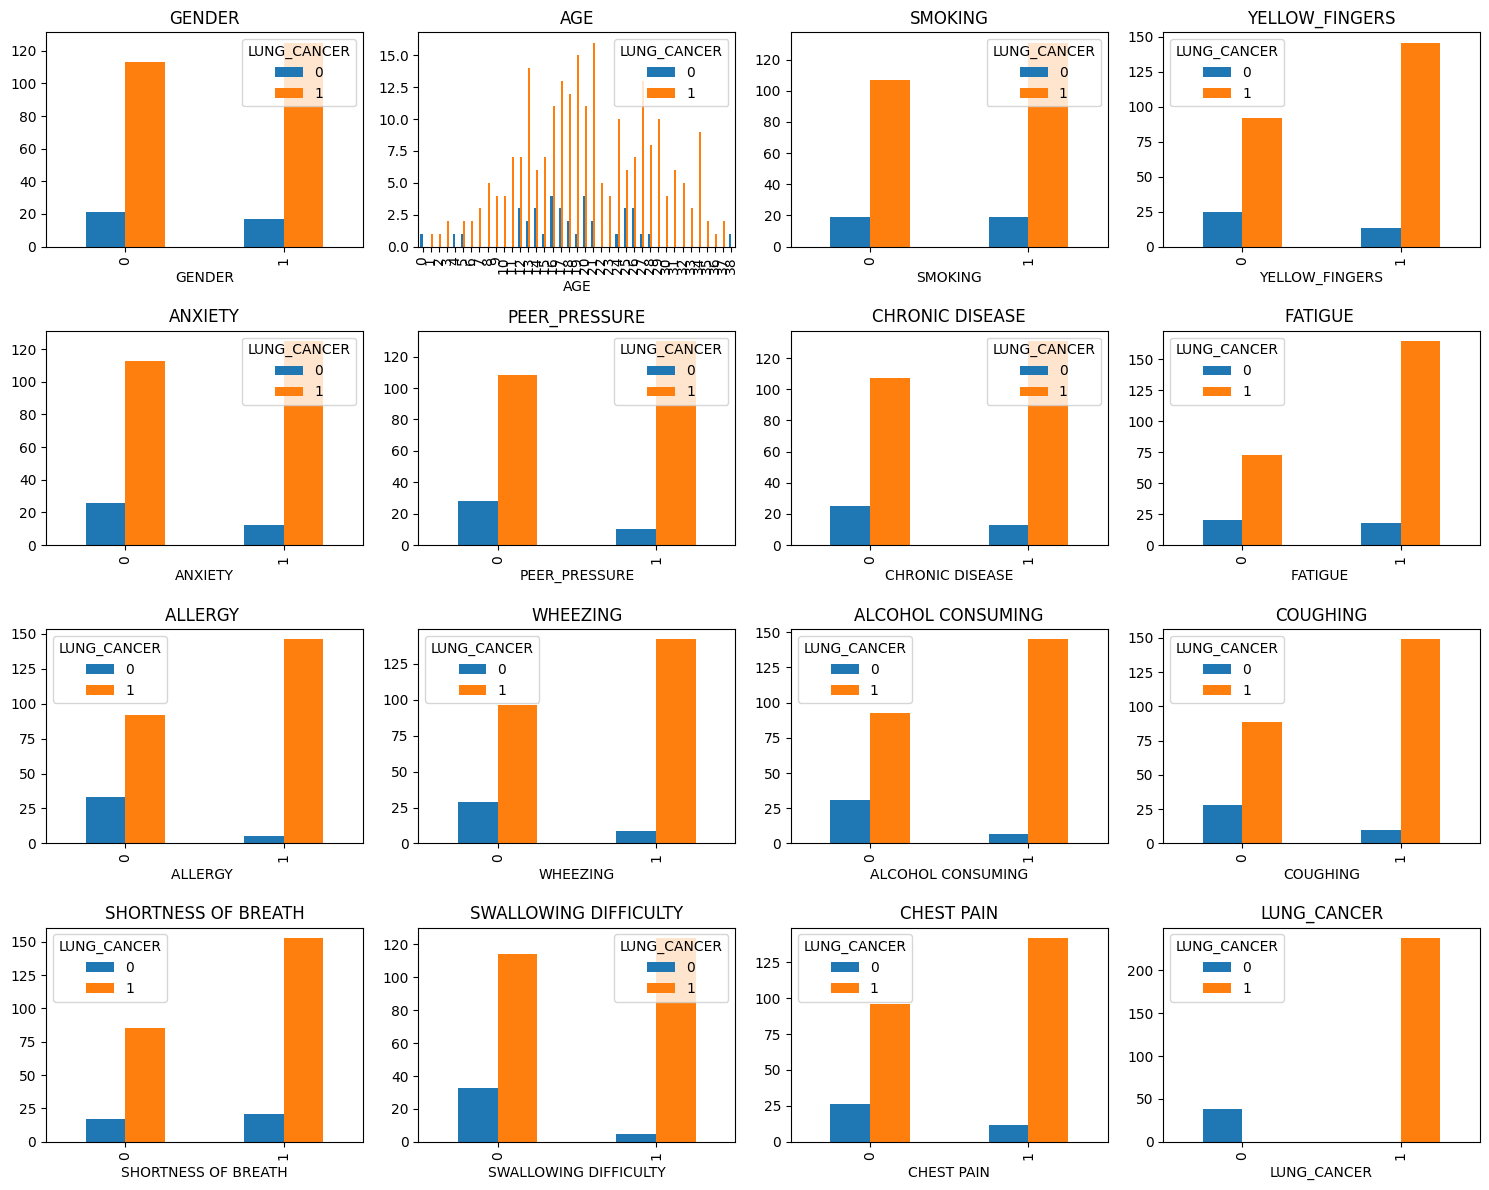

In [ ]:
num_columns = 4
num_rows = (len(df.columns) - 1) // num_columns + 1

# Создаем фигуру и подграфики
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 3))
axes = axes.flatten()

# Строим графики
for i, col in enumerate(df.columns):
  pivot_table = df.pivot_table(index=col, columns='LUNG_CANCER', aggfunc='size', fill_value=0)
  pivot_table.plot(kind='bar', ax=axes[i])
  axes[i].set_title(col)

plt.tight_layout()
plt.show()

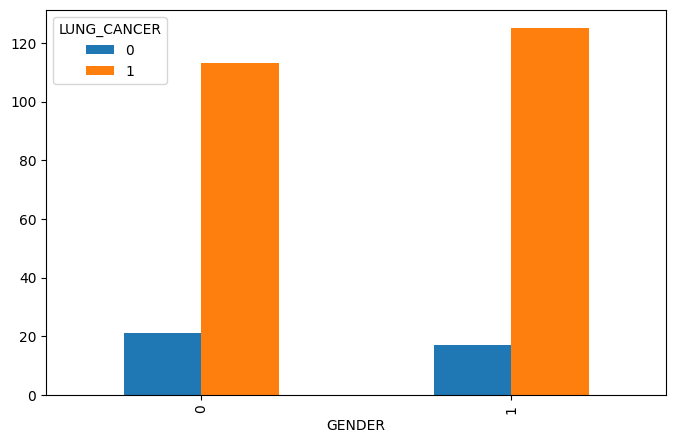

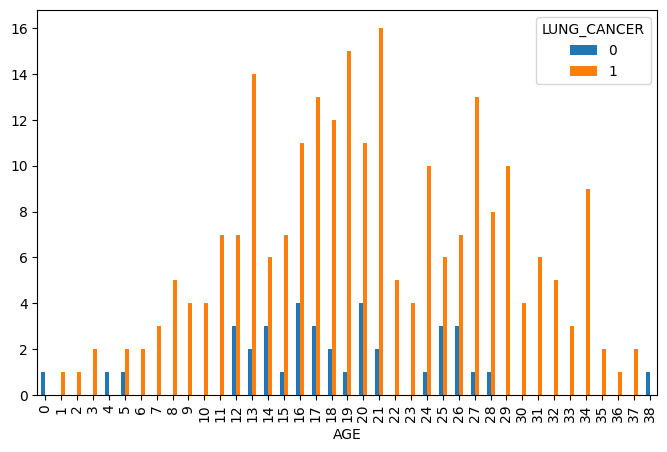

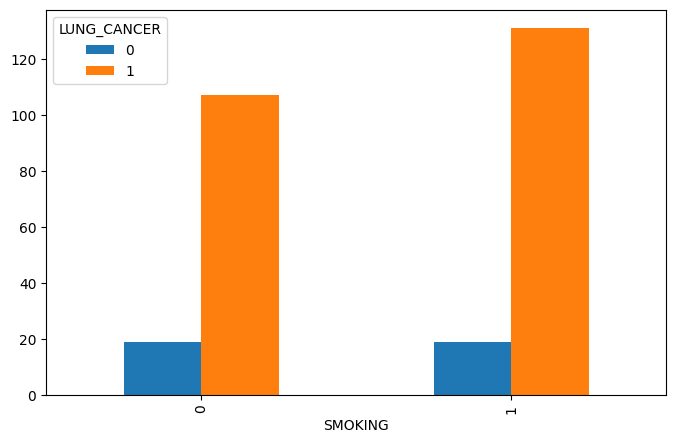

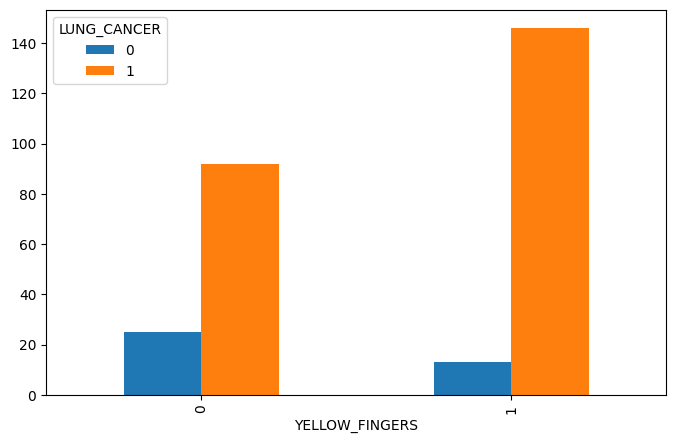

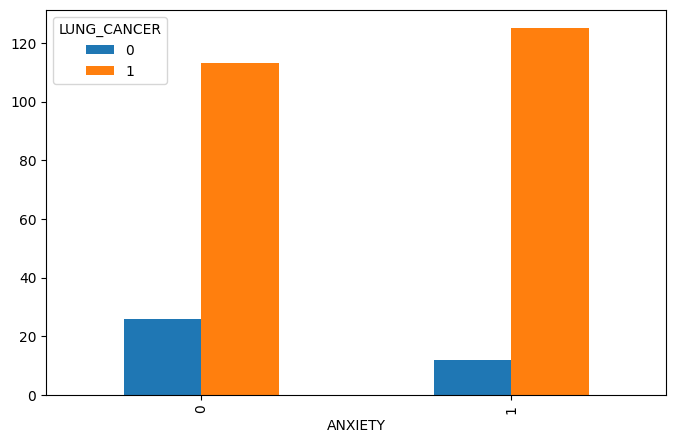

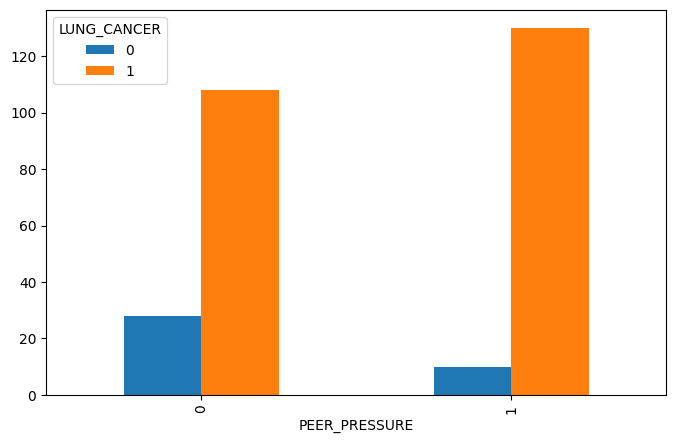

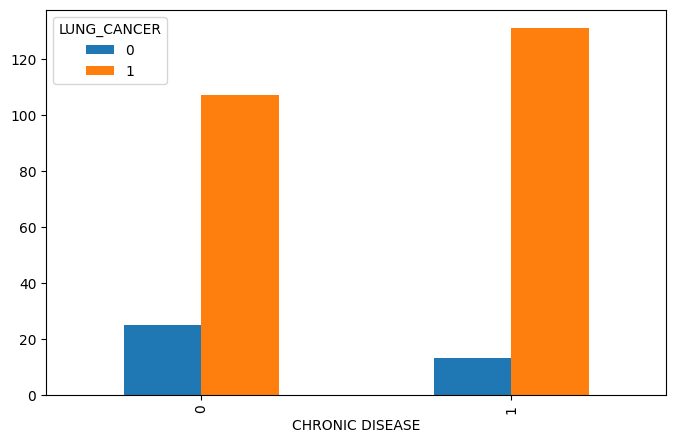

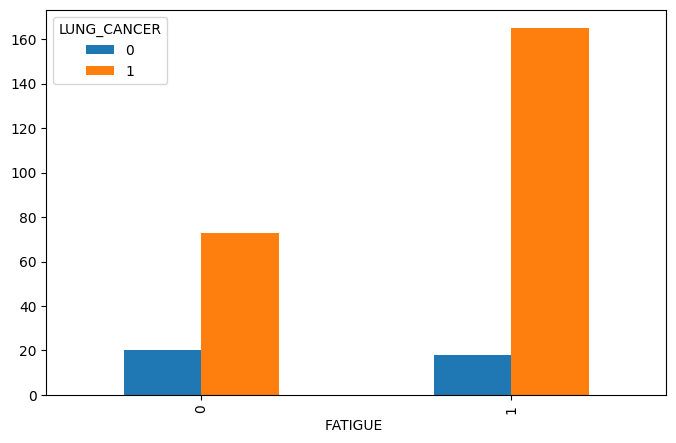

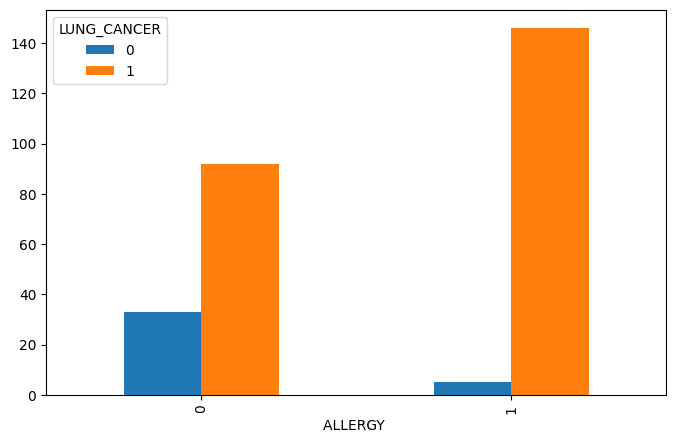

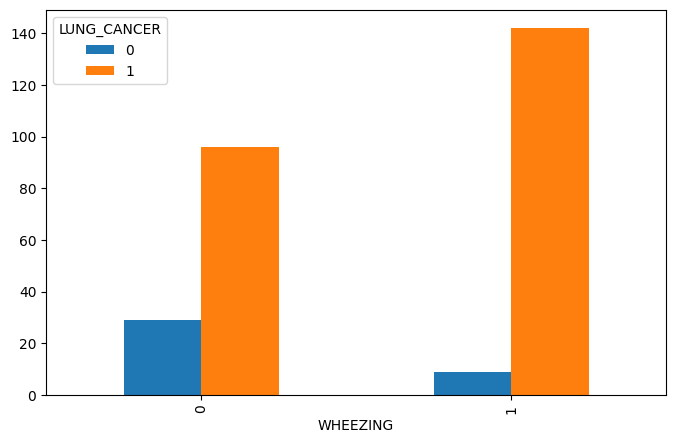

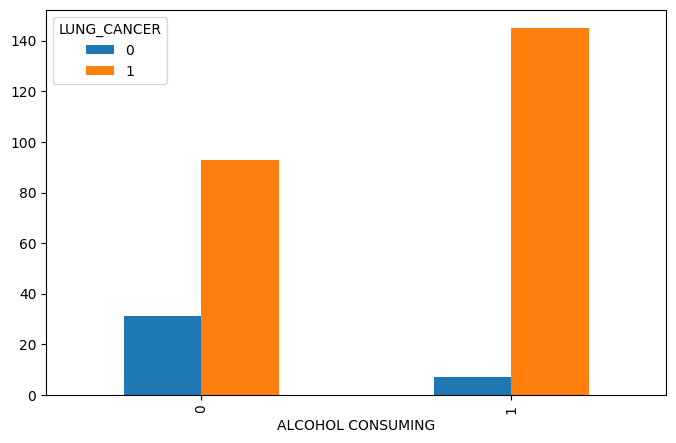

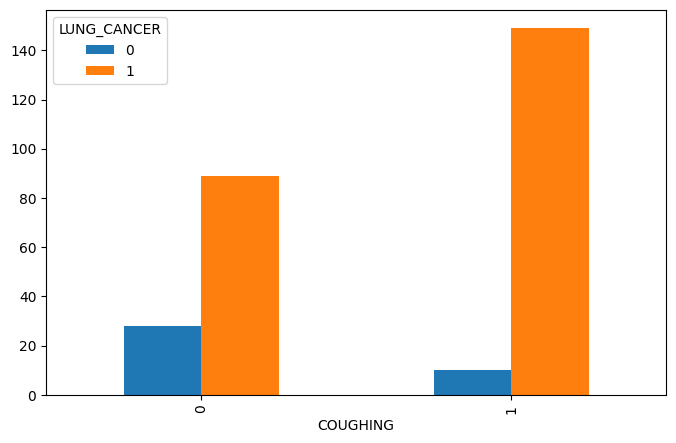

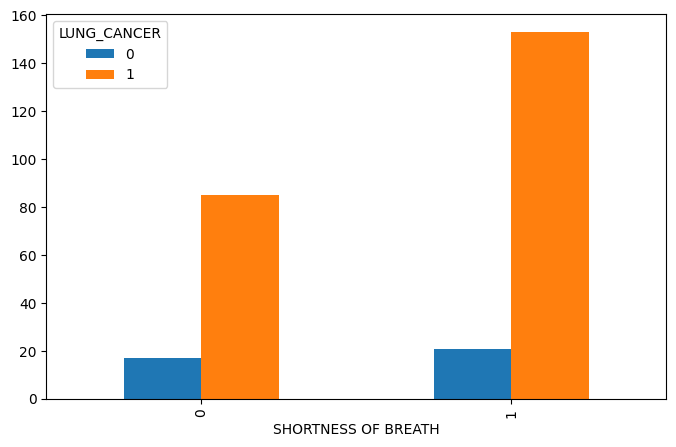

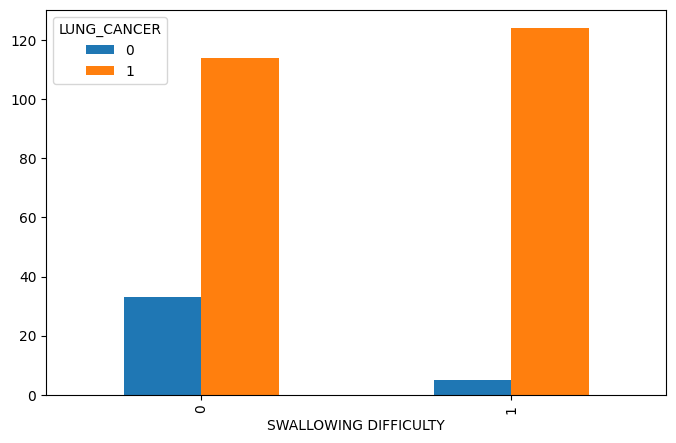

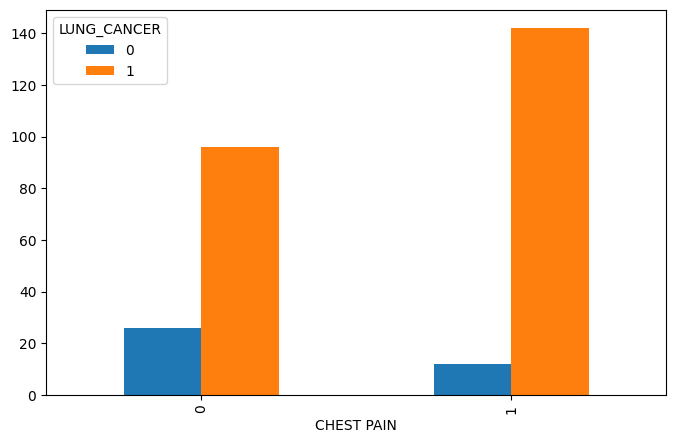

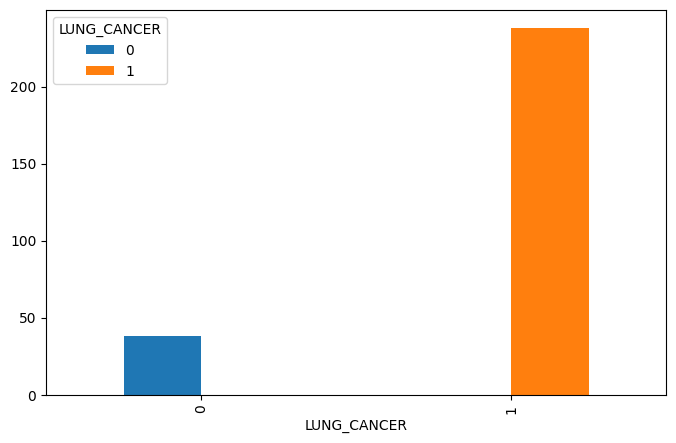

In [ ]:
# for i in df.columns:
#   df.pivot_table(index=i, columns='LUNG_CANCER', aggfunc='size', fill_value=0).plot(kind='bar', figsize=(8,5))
#   plt.show()

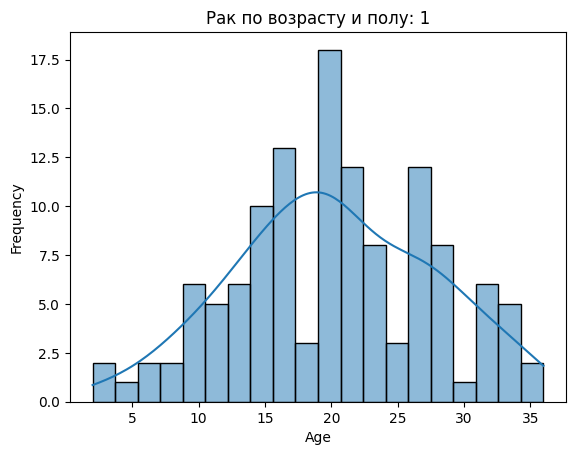

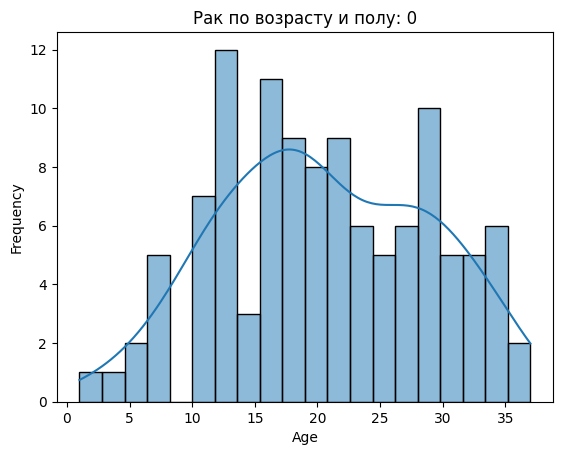

In [ ]:
for x in df['GENDER'].unique():
    plt.figure()  # Create a new figure
    sns.histplot(df.loc[(df['GENDER'] == x) & (df['LUNG_CANCER'] == 1)]['AGE'], kde=True, bins=20)
    plt.title(f'Рак по возрасту и полу: {x}')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

Обучение модели

In [ ]:
X = df.drop('LUNG_CANCER', axis = 1)
y = df['LUNG_CANCER']

In [ ]:
from imblearn.over_sampling import RandomOverSampler

over_samp =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = over_samp.fit_resample(X, y)
X_train_res.shape, y_train_res.shape

((476, 15), (476,))

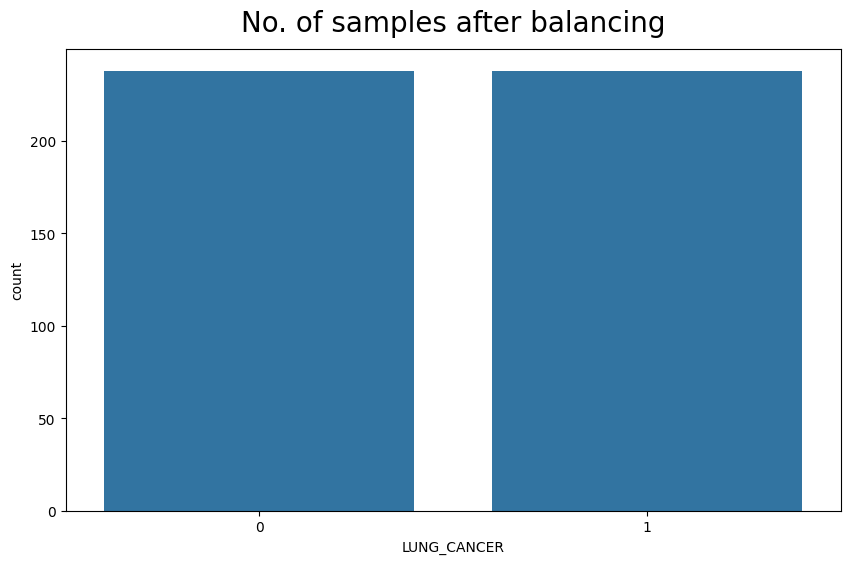

In [ ]:
plt.figure(figsize=(10,6))
plt.title("No. of samples after balancing", fontsize=20, y=1.02)
sns.countplot(x = y_train_res)
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_train_res, y_train_res,test_size=0.2)

Построение моделей регрессий

In [ ]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
yl_predict = lr_model.predict(x_test)

print("classification ")
print(classification_report(y_test, yl_predict))
LinearRegressionScore=accuracy_score(y_test, yl_predict)
print("accuracy score = ", LinearRegressionScore)

classification 
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        51
           1       0.93      0.89      0.91        45

    accuracy                           0.92        96
   macro avg       0.92      0.92      0.92        96
weighted avg       0.92      0.92      0.92        96

accuracy score =  0.9166666666666666


In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
yLN_pred=lr.predict(x_test)
print("classification ")
print("accuracy score = ", accuracy_score(y_test, yl_predict))

classification 
accuracy score =  0.9166666666666666


In [ ]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
RandomForestClassifierScore = rfc.score(x_test, y_test)

print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore)

Accuracy obtained by Random Forest Classifier model: 0.9583333333333334


<Axes: >

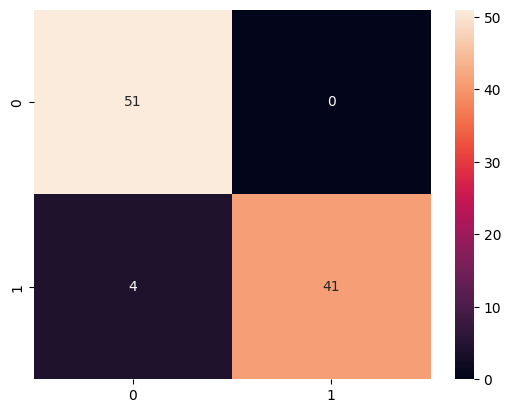

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_rfc = rfc.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.91      0.95        45

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96



In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
KNeighborsClassifierScore = knn.score(x_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore)

Accuracy obtained by K Neighbors Classifier model: 0.90625


<Axes: >

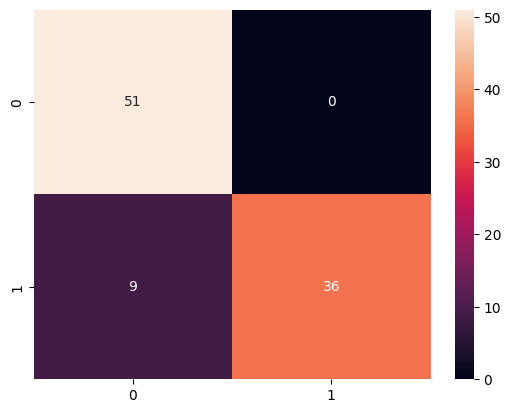

In [ ]:
y_pred_knn = knn.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        51
           1       1.00      0.80      0.89        45

    accuracy                           0.91        96
   macro avg       0.93      0.90      0.90        96
weighted avg       0.92      0.91      0.90        96



In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
DecisionTreeClassifierScore = dtc.score(x_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore)

Accuracy obtained by Decision Tree Classifier model: 0.9270833333333334


<Axes: >

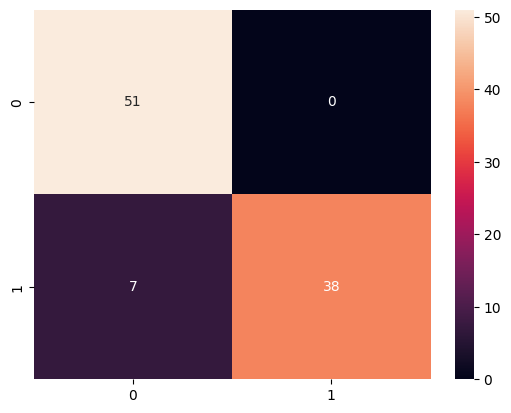

In [ ]:
y_pred_dtc = dtc.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
print(metrics.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        51
           1       1.00      0.84      0.92        45

    accuracy                           0.93        96
   macro avg       0.94      0.92      0.93        96
weighted avg       0.94      0.93      0.93        96



In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
GradientBoostingClassifierScore = gb.score(x_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore)

Accuracy obtained by Gradient Boosting Classifier model: 0.96875


<Axes: >

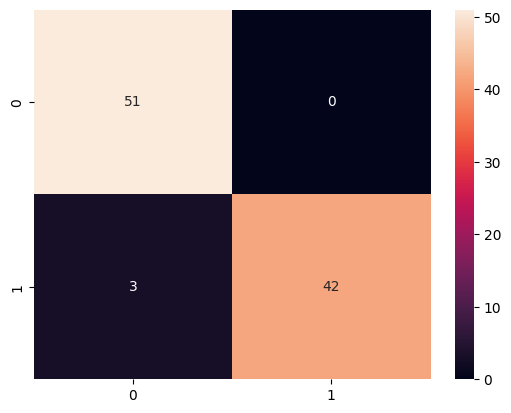

In [ ]:
y_pred_gb = gb.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.93      0.97        45

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96



<ipython-input-65-9f11418672f7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=x,y=y,palette=["#3eb489"]);
<ipython-input-65-9f11418672f7>:15: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax=sns.barplot(x=x,y=y,palette=["#3eb489"]);


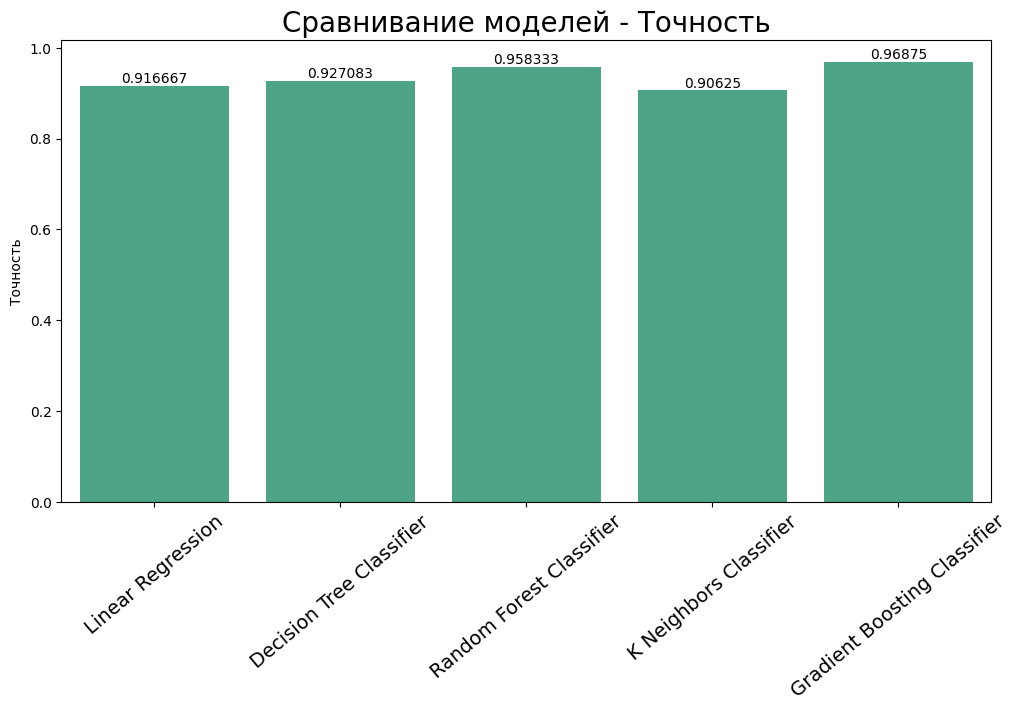

In [ ]:
x = ["Linear Regression",
     "Decision Tree Classifier",
     "Random Forest Classifier",
     "K Neighbors Classifier",
     "Gradient Boosting Classifier"]

y = [LinearRegressionScore,
     DecisionTreeClassifierScore,
     RandomForestClassifierScore,
     KNeighborsClassifierScore,
     GradientBoostingClassifierScore,
     ]

fig, ax = plt.subplots(figsize=(12,6))
ax=sns.barplot(x=x,y=y,palette=["#3eb489"]);
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Точность")
plt.xticks(rotation=40, fontsize=14)
plt.title("Сравнивание моделей - Точность", fontsize=20)

plt.show()